#Problem Set 1 - Solution and Marking Guide

In [1]:
%pylab inline 
# load python's Scientific Libraries

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sympy as sp
import itertools
sp.init_printing(use_unicode=False, wrap_line=False, no_global=True)


#A - Simplified Schelling Model

## 1. Specify explicitly the transition Matrix of the MC for $n = 4$. Explain how the transition probabilities are computed and how the states are labeled.

The states can be enumerated as follows

In [3]:
states_schelling = [(0, 0, 1, 1),
                    (0, 1, 0, 1),
                    (0, 1, 1, 0),
                    (1, 0, 0, 1),
                    (1, 0, 1, 0),
                    (1, 1, 0, 0)]
for i, state in enumerate(states_schelling):
    print("{}. {}".format(i, state))

0. (0, 0, 1, 1)
1. (0, 1, 0, 1)
2. (0, 1, 1, 0)
3. (1, 0, 0, 1)
4. (1, 0, 1, 0)
5. (1, 1, 0, 0)


This chain has four absorbing states, $0$, $2$, $3$ and $5$. Other states are transient.

Two distinct individuals are chosen at each timestep. Each such pair has probability $\frac{1}{6}$. Trading towards absorbing states always happens. Some transitions between transient states are not possible (1->4, 4->1). Thus the main quantities in the transition matrix are.

In [4]:
pick_2 = sp.Rational(1, 6) #1/6
transient_stay = 1 - 4*pick_2 # Probability of staying in a transient state

The transition matrix is given by

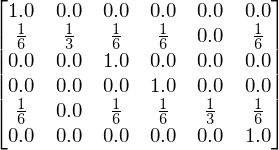

In [5]:
P = sp.Matrix(((1.0, 0.0, 0.0, 0.0, 0.0, 0.0), 
               (pick_2, transient_stay, pick_2, pick_2, 0.0, pick_2),
               (0.0, 0.0, 1.0, 0.0, 0.0, 0.0),
               (0.0, 0.0, 0.0, 1.0, 0.0, 0.0),
               (pick_2, 0.0, pick_2, pick_2, transient_stay, pick_2),
               (0.0, 0.0, 0.0, 0.0, 0.0, 1.0)))
sp.simplify(P)

**Marking (6 marks):** 3 marks for identifying the states, 3 marks for correct transition probabilities.



## 2. Show the canonical form of the Markov chain for $n=4$. Make sure to specify clearly how states are re-labeled or re-ordered if necessary.

The canonical form is given by

\begin{pmatrix}
  \textbf{Q} & \textbf{R}  \\
  \textbf{0} & \textbf{I}  \\
 \end{pmatrix}
 
Here $\textbf{Q}$ shows transitions between transient states, $\textbf{0}$ is made up of zeros, and $\textbf{I}$ is the identity. This matrix results from relabelling states so that trasient states come first.

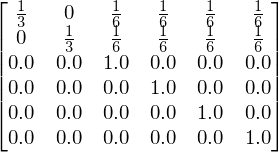

In [6]:
P_canonical = sp.Matrix(((transient_stay, 0, pick_2, pick_2, pick_2, pick_2), 
               (0, transient_stay, pick_2, pick_2, pick_2, pick_2),
               (0.0, 0.0, 1.0, 0.0, 0.0, 0.0),
               (0.0, 0.0, 0.0, 1.0, 0.0, 0.0),
               (0.0, 0.0, 0.0, 0.0, 1.0, 0.0),
               (0.0, 0.0, 0.0, 0.0, 0.0, 1.0)))
sp.simplify(P_canonical)

**Marking (6 marks):** For correct relabelling. Minus 2 marks minor mistakes.

## 3. Using an agent-based model and montecarlo simulations show how the absorption time varies with $n$. 

In [7]:
%run -i ~/PycharmProjects/Schelling/SchellingSimulation.py

The montecarlo simulation relies on a method called *estimate_absorption_time(n)*. The method first looks at all possible starting points (transient states) of size n. Then it samples a random starting point, counting the number of steps required to land in an absorbing state. The average over a number of starting points is the expected time to absorption. 

**Note:** Overall this is a very simple method. The correct computation relies on only looking at starting points that are transient.


In [8]:
x = list(range(4, 11))
y = []
for x_value in x:
    y.append(estimate_absorption_time(x_value, repetitions= 10000))
    print("size = {}, time to abs = {}".format(x_value, y[-1]))

size = 4, time to abs = 1.4943
size = 5, time to abs = 2.5034
size = 6, time to abs = 5.0188
size = 7, time to abs = 8.3005
size = 8, time to abs = 11.9735
size = 9, time to abs = 15.8361
size = 10, time to abs = 19.7033


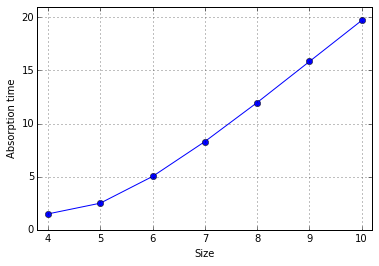

In [12]:
plot(x, y, '-o')
plt.grid()
plt.xlabel("Size")
plt.ylabel("Absorption time")
plt.ylim(0, 21)
plt.xlim(3.8, 10.2)

**Marking (9 marks):** 5 marks for correct Montecarlo procedure estimating time. 2 marks starting only in transient states. 2 marks if results are within reasonable range. 

##  4. Numerically approximate the absorption times for $n=4$ and $n=5$ and show that they agree with the montecarlo simulations.

We need to sum up the components of a vector $\textbf{t} = (\textbf{I}- \textbf{Q})^-1$

For $n=4$, Q is given in excercise 2.

In [13]:
Q_4 = np.array([[1/3, 0],[0, 1/3]])

In [17]:
np.dot(np.linalg.inv(np.eye(2) - Q_4), (1, 1))

array([ 1.5,  1.5])

For $n=4$, absorption time is 1.5. This is in perfect agreement with the simulations in the previous question.

For $n=5$ there are 10 states. In this case $5$ states are transient: 
$[1, 1, 0, 1, 0], [0, 1, 0, 1, 1], [0, 1, 1, 0, 1], [1, 0, 1, 0, 1], [1, 0, 1, 1, 0]$

all other states are absorbing. For the matching of individuals, there are 10 possible choices of distinct pairs.

Q must be diagonal, since no transition between transient states will improve the situation of the agents. Each transient state has 4 reachable absorbing states. The probability of leaving an absorbing state is thus $\frac{4}{10}$.
The probability to stay in a transient state is $1 - \frac{4}{10}  = \frac{6}{10}$

In [27]:
Q_5 = np.eye(5)*(6/10)
Q_5                 

array([[ 0.6,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0.6,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0.6,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0.6,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0.6]])

In [24]:
np.dot(np.linalg.inv(np.eye(5) - Q_5), (1, 1, 1, 1, 1))

array([ 2.5,  2.5,  2.5,  2.5,  2.5])

For $n=5$, absorption time is 2.5. This is in perfect agreement with the simulations in the previous question.

**Marking (9 marks):** For n=4, 3 marks . 6 marks for correct n=5 including reasoning. Minor mistakes 2 marks off.

# B - Mistakes

We now turn to a model in which agent may swap places ``by mistake''. This means with a probability $\epsilon$ they will swap places when they do not intend to, or will fail to stay put when they should. This small change results in a new chain that is ergodic.For numerical and simulation results assume a small $\epsilon$

## 1. Specify the full transition matrix for $n=4$, compute the stationary distribution numerically and show that it is in agreement with Montecarlo simulations. What can you conclude from this model?

Recall for $n=4$ we have 6 states. 4 states (previously absorbing) are happy: agents will only move away by mistake. 2 states (previously transient) are unhappy: agents will stay by mistake.

In [33]:
epsilon = sp.Symbol('\epsilon')

Consider leaving a happy state, this only happens by mistake. You can leave to 4 other states, given that one is unreachable.

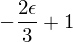

In [56]:
stay_happy = 1-(4*epsilon/6)
stay_happy

In [62]:
leave_happy = epsilon/6
leave_happy

Thus, transitions out of state $0$, for example, are given by the following vector:

In [63]:
sp.Matrix((stay_happy, leave_happy,leave_happy,leave_happy,leave_happy,0 )).transpose()

Consider leaving an unhappy state, this only happens if you do not make a mistake. 
You can leave to 4 other states, given that one is unreachable. 

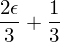

In [60]:
stay_unhappy = 1-(4*(1-epsilon)/6)
stay_unhappy

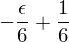

In [64]:
leave_unhappy = (1-epsilon)/6
leave_unhappy

Thus, transitions out of state $1$, for example, are given by the following vector:

In [65]:
sp.Matrix( (leave_unhappy, stay_unhappy, leave_unhappy, leave_unhappy, 0.0, leave_unhappy)).transpose()

The whole transition matrix is given by

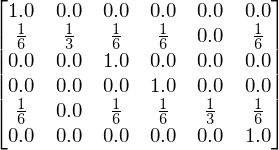

In [66]:
P

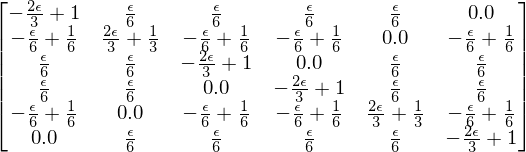

In [69]:
P_epsilon = sp.Matrix(((stay_happy, leave_happy,leave_happy,leave_happy,leave_happy,0.0 ), 
               (leave_unhappy, stay_unhappy, leave_unhappy, leave_unhappy, 0.0, leave_unhappy),
               (leave_happy, leave_happy, stay_happy, 0.0, leave_happy, leave_happy),
               (leave_happy, leave_happy, 0.0, stay_happy, leave_happy, leave_happy),
               (leave_unhappy, 0.0, leave_unhappy, leave_unhappy, stay_unhappy, leave_unhappy),
               (0.0, leave_happy, leave_happy, leave_happy,leave_happy, stay_happy)))
sp.simplify(P_epsilon)

####Numerical computation

Let's set $\epsilon = 0.01$.

In [82]:
P_N = np.array(sp.N(P_epsilon, subs= {epsilon:0.01}))

No we compute the stationary distribution, by taking a large power of this matrix

In [81]:
stationary = np.linalg.matrix_power(P_N, 1000000)[0]
for i, state in enumerate(states_schelling):
    print("{}. {}; {}".format(i, state, stationary[i]))

0. (0, 0, 1, 1); 0.248743718581695
1. (0, 1, 0, 1); 0.00251256281395651
2. (0, 1, 1, 0); 0.248743718581695
3. (1, 0, 0, 1); 0.248743718581695
4. (1, 0, 1, 0); 0.00251256281395651
5. (1, 1, 0, 0); 0.248743718581692


Clearly most of the time is spent in seggregated states!

###Simulation

In [84]:
from collections import Counter

We run the chain for 5000000 steps. Couting how much time is spent in each state.

In [85]:
ct = Counter()
sim =SimplifiedSchellingSimulation([False, True, False, True], cycle=True, mistake_probability=0.01)
for i in range(5000000):
    ct[tuple(sim.state)] = ct[tuple(sim.state)] +1
    sim.step()

The Montecarlo estimation of the stationary distribution is as follows:

In [86]:
observations = sum(list(ct.values()))  
np.set_printoptions(suppress=True, precision=3)
for i in ct.keys():
    print(i, ct[i]/observations)

(False, True, True, False) 0.2513488
(True, False, True, False) 0.0025284
(True, True, False, False) 0.2475202
(False, True, False, True) 0.0025124
(False, False, True, True) 0.2474332
(True, False, False, True) 0.248657


We find perfect agreeement with the numerical calculation using the theory! 

**Marking:** 10 marks for theory, 5 marks simulation, 5 marks agreement theory and simulation

## 2. Repeat this analysis in the case where agents do not live on a cycle, but on a simple linear structure; i.e., the agents on both ends only have one neighbour. 

###Theory

The main observation here is that states [1, 0, 0, 1] and [0, 1, 1, 0] are no longer happy sates. This changes transitions coming out of those states. Notice that the remaining rows do not change.  

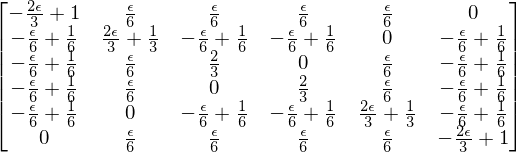

In [105]:
P_epsilon_line = sp.Matrix(((stay_happy, leave_happy,leave_happy,leave_happy,leave_happy,0), 
               (leave_unhappy, stay_unhappy, leave_unhappy, leave_unhappy, 0, leave_unhappy),
               (leave_unhappy, leave_happy, sp.Rational(2,3), 0, leave_happy, leave_unhappy),
               (leave_unhappy, leave_happy, 0, sp.Rational(2,3), leave_happy, leave_unhappy),
               (leave_unhappy, 0, leave_unhappy, leave_unhappy, stay_unhappy, leave_unhappy),
               (0, leave_happy, leave_happy, leave_happy,leave_happy, stay_happy)))
sp.simplify(P_epsilon_line)

In [108]:
P_line_N = np.array(sp.N(P_epsilon_line, subs= {epsilon:0.01}))
stationary = np.linalg.matrix_power(P_line_N, 1000000)[0]
for i, state in enumerate(states_schelling):
    print("{}. {}; {}".format(i, state, stationary[i]))

0. (0, 0, 1, 1); 0.490099009884916
1. (0, 1, 0, 1); 0.00251256281398794
2. (0, 1, 1, 0); 0.00738842728469721
3. (1, 0, 0, 1); 0.00738842728469721
4. (1, 0, 1, 0); 0.00251256281398794
5. (1, 1, 0, 0); 0.490099009884914


Now each segregated state concentrates almost half the time in stationarity.

###Simulation

Same as before, but now we set the cycle argument to True.

In [87]:
ct = Counter()
sim =SimplifiedSchellingSimulation([False, True, False, True], cycle=False, mistake_probability=0.01)
for i in range(5000000):
    ct[tuple(sim.state)] = ct[tuple(sim.state)] +1
    sim.step()

The Montecarlo estimation of the stationary distribution is given by:

In [88]:
observations = sum(list(ct.values()))  
np.set_printoptions(suppress=True, precision=3)
for i in ct.keys():
    print(i, ct[i]/observations)

(False, True, True, False) 0.007276
(True, False, True, False) 0.0024954
(False, False, True, True) 0.486986
(True, True, False, False) 0.4931656
(False, True, False, True) 0.002489
(True, False, False, True) 0.007588


This agrees perfectly with the theory!

**Marking:** 10 marks for theory, 5 marks simulation, 5 marks agreement theory and simulation

#C - Discussion

## Discuss reasonable extensions of this model that would allow for richer, and perhaps more realistic dynamics, while keeping tractability at hand. 

**Example 1:**, allow for 1 more slot than agents, yielding a blank space. Provides the feature of empty slots (central to the original Schelling model) while keeping tractability somehow reasonable.

**Example 2:** Another possibility is to allow for levels of happiness. For example, happiness equals the number of neighbours of the same type. This does not change the size of the space, but may add nuanced dynamics.

**Marking: ** For this question we want to have evidence that there is a **balance** between possible extensions and tractability. Reasonable extensions alone, 5 marks. Reasonable extensions with a discussion of tractability 10 marks.

#D - Congestion game

#### 50 agents are tasked with routing one packet each through a network from vertex $S$ to vertex $T$. There is no central control, so each agent is autonomous and strives to minimize total latency for each packet sent through. The structure of the network is presented in Figure one. The edges $S-A$, and $B-T$ have a latency equal to the number of packets going through the edges. Edges $S-B$ and $A-T$ have constant latency. For example, a single packet going through a route $S-A-T$ has latency $51$. If $20$ agents are using that very same route, each will experience a latency of $70$, and so on.

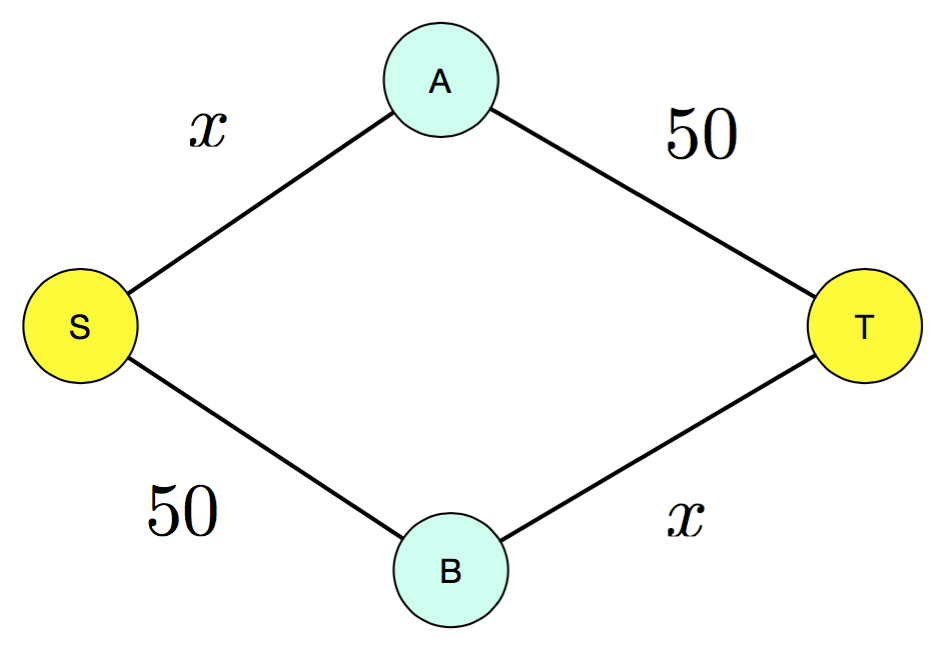

In [116]:
from IPython.display import Image
Image(filename='network.png', width=250) 

###1. Use a game theoretical argument to predict what each agent should do. Compute the average latency experienced by each agent for your prediction. 

It's natural to predict that traffic will split equally over the 2 paths, so the journey time in each path is 50 + 25 = 75 minutes. Average latency is 75.

This actually corresponds to a Nash equilibrium of this game. To see this assume that the agents are split 50-50 over the 2 paths. If a single agent changes his strategy, his journey time will increase from 75 to 76 minutes.

Note that this routing game can be seen as a standard N-player game (with $N = 50$). If the strategies chosen by the 50 players are $S^{1},S^{2},...,S^{50} \in \{A,B\}^{50}$.

**Marking: ** 5 marks for identifying Nash, 3 marks for correct reasoning, 2 marks for latency.

###A new high-sped technology is introduced that allows for very low-latency traffic. This technology is expensive, so an edge is afforded and the network is modified as specified in Figure 2. How does your prediction change, and what is the gain experienced by each agent in this new configuration? 

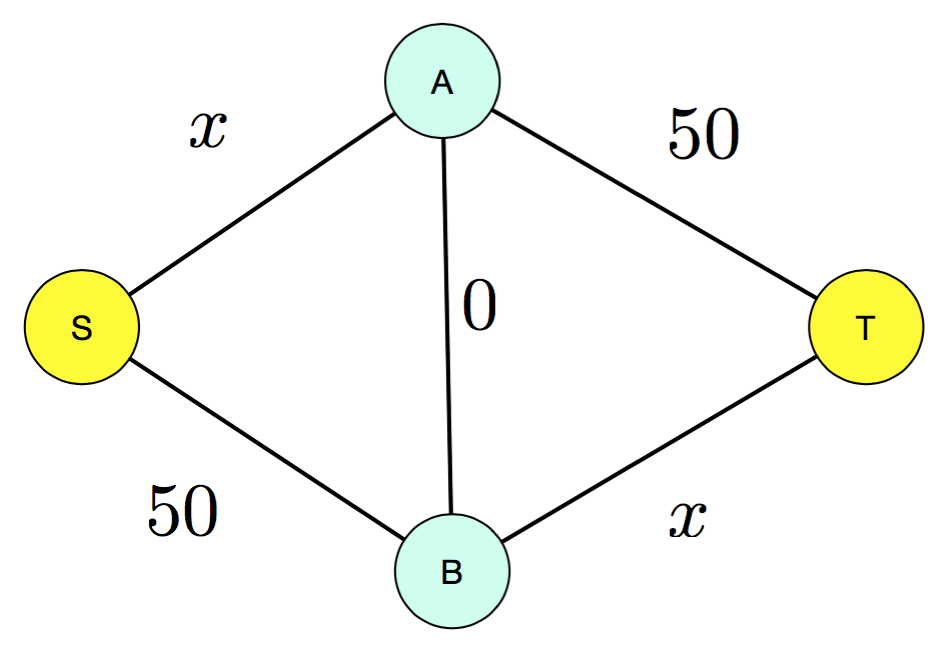

In [117]:
from IPython.display import Image
Image(filename='network_2.png', width=250) 

Now the half-split solution is no longer Nash Equilibrium. Because in this situation every driver has an incentive to take the new route s → A → B → t. This route yields a latency of 26+0+25 = 51.

We can continue this reasonning until all agents take the new route. This situation is a Nash equilibrium, because if all the drivers take s → A → B → t, no driver has an incentive to switch to s → A → t or s → B → t. The average latency in this new equilibrium is 100.

The new link worsens things for everyone. 

**Marking: ** 5 marks for identifying Nash, 3 marks for correct reasoning, 2 marks for latency.